<a href="https://www.kaggle.com/code/filipkin/warsaw-flats?scriptVersionId=220124451" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install feature_engine

Looking in links: /kaggle/input/pm-68105865-at-01-31-2025-19-35-02/


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import math
import missingno as msno
import matplotlib.pyplot as plt
import re
import scipy as sc
import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from feature_engine.imputation import CategoricalImputer
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("/kaggle/input/warsaw-flat-rent-prices/otodom_complete.csv", dtype={'id': 'Int64'})

In [4]:
df.head()

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
0,1612265907-2487,https://www.otodom.pl/wynajem/mieszkanie/warsz...,37 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-od-zar...,"Warszawa, Włochy, ul. 1 Sierpnia",2 100 zł,Kaucja:2 100 zł,Powierzchnia:37 m²,Liczba pokoi:2,NaN,...,klimatyzacja,Nr oferty w Otodom: 61451923,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 3 dni temu,NaN,NaN,NaN,NaN
1,1612264314-1965,https://www.otodom.pl/wynajem/mieszkanie/warsz...,38 m²\n \n ...,https://www.otodom.pl/pl/oferta/2-pokoje-tanio...,"Warszawa, Mokotów, ul. Suwak 11",1 825 zł,Kaucja:3 400 zł,Powierzchnia:38 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,garaż/miejsce parkingowewindapom. użytkowe,Nr oferty w Otodom: 61405987,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:350 zł,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN
2,1612263242-1616,https://www.otodom.pl/wynajem/mieszkanie/warsz...,57 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-mieszk...,"Warszawa, Bielany, ul. Kwitnąca",3 300 zł,Kaucja:3 300 zł,Powierzchnia:57 m²,Liczba pokoi:3,Rodzaj zabudowy:blok,...,balkontylko dla niepalącychoddzielna kuchnia,Nr oferty w Otodom: 61375474,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:1 zł,Data aktualizacji: 22 dni temu,NaN,NaN,NaN,NaN
3,1612265477-2346,https://www.otodom.pl/wynajem/mieszkanie/warsz...,63 m²\n \n ...,https://www.otodom.pl/pl/oferta/zielone-zacisz...,"Warszawa, Targówek, ul. św. Wincentego",2 200 zł,NaN,Powierzchnia:63 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,NaN,Nr oferty w Otodom: 61439492,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 5 dni temu,NaN,NaN,NaN,NaN
4,1612266187-2579,https://www.otodom.pl/wynajem/mieszkanie/warsz...,65 m²\n \n ...,https://www.otodom.pl/pl/oferta/eleganckie-mie...,"Warszawa, Ochota, Stara Ochota, ul. Juliana Ur...",3 000 zł,Kaucja:3 000 zł,Powierzchnia:65 m²,Liczba pokoi:3,Rodzaj zabudowy:kamienica,...,NaN,Nr oferty w Otodom: 61455072,NaN,NaN,NaN,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'offer_url',
       'offer_url-href', 'location', 'net_price', 'deposit', 'area',
       'room_num', 'build_type', 'floor', 'total_floor', 'build_mat',
       'windows', 'heating', 'year_built', 'status', 'agd', 'security',
       'add_info', 'rest_info', 'offer_ID', 'next_pagination',
       'next_pagination-href', 'add_cost', 'offer_last_update', 'second_page',
       'second_page-href', 'third_page', 'third_page-href'],
      dtype='object')

In [6]:
df.describe()

,next_pagination,second_page,third_page
count,0.0,137.0,41.0
mean,NaN,2.0,3.0
std,NaN,0.0,0.0
min,NaN,2.0,3.0
25%,NaN,2.0,3.0
50%,NaN,2.0,3.0
75%,NaN,2.0,3.0
max,NaN,2.0,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      3482 non-null   object 
 1   web-scraper-start-url  3482 non-null   object 
 2   offer_url              3482 non-null   object 
 3   offer_url-href         3482 non-null   object 
 4   location               3481 non-null   object 
 5   net_price              3481 non-null   object 
 6   deposit                3146 non-null   object 
 7   area                   3481 non-null   object 
 8   room_num               3481 non-null   object 
 9   build_type             3339 non-null   object 
 10  floor                  3401 non-null   object 
 11  total_floor            3045 non-null   object 
 12  build_mat              2239 non-null   object 
 13  windows                2899 non-null   object 
 14  heating                2998 non-null   object 
 15  year

In [8]:
df.shape

(3482, 30)

In [9]:
df.isna().sum()

web-scraper-order           0
web-scraper-start-url       0
offer_url                   0
offer_url-href              0
location                    1
net_price                   1
deposit                   336
area                        1
room_num                    1
build_type                143
floor                      81
total_floor               437
build_mat                1243
windows                   583
heating                   484
year_built               1014
status                    291
agd                        47
security                   90
add_info                  292
rest_info                1470
offer_ID                    1
next_pagination          3482
next_pagination-href     1014
add_cost                 1567
offer_last_update           1
second_page              3345
second_page-href         3345
third_page               3441
third_page-href          3441
dtype: int64

In [10]:
df[df['area'].isna()]



,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
131,1612263424-1676,https://www.otodom.pl/wynajem/mieszkanie/warsz...,50 m²\n \n ...,https://www.otodom.pl/pl/oferta/powisle-gornos...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def extract_number(text):
    match = re.search(r'(\d+)', text)
    return float(match.group(0)) if match else None
df.loc[df['area'].isna(), 'area'] = df.loc[df['area'].isna(), 'offer_url'].apply(lambda x: extract_number(x) if isinstance(x, str) else None)


In [12]:
df["offer_url-href"]

0       https://www.otodom.pl/pl/oferta/wynajme-od-zar...
1       https://www.otodom.pl/pl/oferta/2-pokoje-tanio...
2       https://www.otodom.pl/pl/oferta/wynajme-mieszk...
3       https://www.otodom.pl/pl/oferta/zielone-zacisz...
4       https://www.otodom.pl/pl/oferta/eleganckie-mie...
                              ...                        
3477    https://www.otodom.pl/pl/oferta/wynajme-mieszk...
3478    https://www.otodom.pl/pl/oferta/mieszkanie-2-p...
3479    https://www.otodom.pl/pl/oferta/2-pokoje-umebl...
3480    https://www.otodom.pl/pl/oferta/mieszkanie-1-p...
3481    https://www.otodom.pl/pl/oferta/mieszkanie-2-p...
Name: offer_url-href, Length: 3482, dtype: object

In [13]:
def find_rooms(url):
    if re.search(r"\bpokoje\b|\bpokojowe\b", url):
        return True
    return False

In [14]:
df["pokoj_url_mention"] = df["offer_url-href"].apply(find_rooms)

In [15]:
df["pokoj_url_mention"]

0        True
1        True
2       False
3        True
4       False
        ...  
3477    False
3478    False
3479     True
3480     True
3481     True
Name: pokoj_url_mention, Length: 3482, dtype: bool

In [16]:
# Filtracja DataFrame
brak_room_num = df[(df["pokoj_url_mention"] == True) & (df["room_num"].isna())]

# Wyświetlenie wyniku
brak_room_num


,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href,pokoj_url_mention
131,1612263424-1676,https://www.otodom.pl/wynajem/mieszkanie/warsz...,50 m²\n \n ...,https://www.otodom.pl/pl/oferta/powisle-gornos...,NaN,NaN,NaN,50.0,NaN,NaN,...,NaN,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,NaN,NaN,NaN,NaN,NaN,True


In [17]:
df[df['area'].isna()]

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href,pokoj_url_mention


In [18]:
df.drop(["web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","third_page-href","web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","next_pagination","next_pagination-href","offer_last_update","second_page","second_page-href","third_page","third_page-href","offer_ID"], axis = 1, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location           3481 non-null   object
 1   net_price          3481 non-null   object
 2   deposit            3146 non-null   object
 3   area               3482 non-null   object
 4   room_num           3481 non-null   object
 5   build_type         3339 non-null   object
 6   floor              3401 non-null   object
 7   total_floor        3045 non-null   object
 8   build_mat          2239 non-null   object
 9   windows            2899 non-null   object
 10  heating            2998 non-null   object
 11  year_built         2468 non-null   object
 12  status             3191 non-null   object
 13  agd                3435 non-null   object
 14  security           3392 non-null   object
 15  add_info           3190 non-null   object
 16  rest_info          2012 non-null   object


In [20]:
columns_to_clean = ["deposit","room_num","area","total_floor","floor","net_price","year_built","add_cost"]
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.replace(r'\D', '', regex=True))

In [21]:
df['location'] = df['location'].str.split(',').str[1].str.strip()

In [22]:
columns_to_clean1 = ["build_type","status","heating","windows","build_mat"]
df[columns_to_clean1] = df[columns_to_clean1].astype(str)
for col in columns_to_clean1:
    df[col] = df[col].str.split(pat=":", expand=True)[1] 

In [23]:
df

,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,heating,year_built,status,agd,security,add_info,rest_info,add_cost,pokoj_url_mention
0,Włochy,2100,2100,37,2,None,,4,None,plastikowe,None,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,domofon / wideofon,internet,klimatyzacja,NaN,True
1,Mokotów,1825,3400,38,2,blok,,NaN,pustak,plastikowe,miejskie,2020,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,domofon / wideofonmonitoring / ochrona,telewizja kablowainternet,garaż/miejsce parkingowewindapom. użytkowe,350,True
2,Bielany,3300,3300,57,3,blok,,15,wielka płyta,drewniane,miejskie,1984,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamaniowedomofon / wideofonm...,telewizja kablowainternet,balkontylko dla niepalącychoddzielna kuchnia,1,False
3,Targówek,2200,NaN,63,2,blok,4,5,cegła,drewniane,miejskie,2005,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,balkon,NaN,NaN,True
4,Ochota,3000,3000,65,3,kamienica,3,4,cegła,plastikowe,miejskie,1938,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,drzwi / okna antywłamanioweteren zamkniętydomo...,piwnicawindatylko dla niepalącychoddzielna kuc...,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,Praga-Południe,2000,2500,45,1,apartamentowiec,3,7,None,None,None,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,monitoring / ochrona,telewizja kablowainternettelefon,winda,350,False
3478,Wilanów,3300,3000,50,2,blok,1,2,cegła,plastikowe,miejskie,2006,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamanioweteren zamkniętydomo...,telewizja kablowainternet,balkonpiwnicagaraż/miejsce parkingowepom. użyt...,NaN,False
3479,Praga-Południe,2500,2500,4666,2,apartamentowiec,5,5,cegła,plastikowe,miejskie,2015,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,telewizja kablowainternettelefon,balkongaraż/miejsce parkingowewindatylko dla n...,NaN,True
3480,Praga-Północ,1300,1700,23,1,kamienica,,4,cegła,drewniane,kotłownia,1938,do zamieszkania,lodówkameblepralka,drzwi / okna antywłamaniowe,internet,tylko dla niepalących,270,True


In [24]:

columns_to_convert = ["net_price", "area","deposit","room_num","floor","total_floor","year_built","add_cost"]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           3481 non-null   object 
 1   net_price          3481 non-null   float64
 2   deposit            3146 non-null   float64
 3   area               3481 non-null   float64
 4   room_num           3481 non-null   float64
 5   build_type         3339 non-null   object 
 6   floor              3060 non-null   float64
 7   total_floor        3045 non-null   float64
 8   build_mat          2239 non-null   object 
 9   windows            2899 non-null   object 
 10  heating            2998 non-null   object 
 11  year_built         2468 non-null   float64
 12  status             3191 non-null   object 
 13  agd                3435 non-null   object 
 14  security           3392 non-null   object 
 15  add_info           3190 non-null   object 
 16  rest_info          2012 

In [26]:
cat_col_to_impute = ['location', 'build_type',"build_mat","windows","heating","status","add_info","rest_info","security","agd"]
catimp = CategoricalImputer(imputation_method="frequent")
imputed_df = catimp.fit_transform(df[cat_col_to_impute])
df[cat_col_to_impute] = imputed_df

In [27]:
df

,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,heating,year_built,status,agd,security,add_info,rest_info,add_cost,pokoj_url_mention
0,Włochy,2100.0,2100.0,37.0,2.0,blok,NaN,4.0,cegła,plastikowe,miejskie,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,domofon / wideofon,internet,klimatyzacja,NaN,True
1,Mokotów,1825.0,3400.0,38.0,2.0,blok,NaN,NaN,pustak,plastikowe,miejskie,2020.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,domofon / wideofonmonitoring / ochrona,telewizja kablowainternet,garaż/miejsce parkingowewindapom. użytkowe,350.0,True
2,Bielany,3300.0,3300.0,57.0,3.0,blok,NaN,15.0,wielka płyta,drewniane,miejskie,1984.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamaniowedomofon / wideofonm...,telewizja kablowainternet,balkontylko dla niepalącychoddzielna kuchnia,1.0,False
3,Targówek,2200.0,NaN,63.0,2.0,blok,4.0,5.0,cegła,drewniane,miejskie,2005.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,balkon,wynajmę również studentom,NaN,True
4,Ochota,3000.0,3000.0,65.0,3.0,kamienica,3.0,4.0,cegła,plastikowe,miejskie,1938.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,drzwi / okna antywłamanioweteren zamkniętydomo...,piwnicawindatylko dla niepalącychoddzielna kuc...,wynajmę również studentom,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,Praga-Południe,2000.0,2500.0,45.0,1.0,apartamentowiec,3.0,7.0,cegła,plastikowe,miejskie,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,monitoring / ochrona,telewizja kablowainternettelefon,winda,350.0,False
3478,Wilanów,3300.0,3000.0,50.0,2.0,blok,1.0,2.0,cegła,plastikowe,miejskie,2006.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamanioweteren zamkniętydomo...,telewizja kablowainternet,balkonpiwnicagaraż/miejsce parkingowepom. użyt...,NaN,False
3479,Praga-Południe,2500.0,2500.0,4666.0,2.0,apartamentowiec,5.0,5.0,cegła,plastikowe,miejskie,2015.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,telewizja kablowainternettelefon,balkongaraż/miejsce parkingowewindatylko dla n...,NaN,True
3480,Praga-Północ,1300.0,1700.0,23.0,1.0,kamienica,NaN,4.0,cegła,drewniane,kotłownia,1938.0,do zamieszkania,lodówkameblepralka,drzwi / okna antywłamaniowe,internet,tylko dla niepalących,270.0,True


In [28]:
# Define the list of columns to check
columns_to_check = ['add_info', 'rest_info', 'security', 'agd']

# Example list of common words to search for and remove
common_words = ['internet', 'balkon', 'piwnica',"telewizja kablowa","winda", "garaż/miejsce parkingowe","taras","ogródek","winda","telefon","oddzielna kuchnia",
                
                "pom. użytkowe","klimatyzacja","dwupoziomowe","tylko dla niepalących","wynajmę również studentom","zmywarka","lodówka","pralka","kuchenka","meble","piekarnik","telewizor"
               ,"drzwi / okna antywłamaniowe","monitoring","teren zamknięty","ochrona","domofon / wideofon", "system alarmowy", "rolety antywłamaniowe", "system alarmowy / rolety antywłamaniowe"
               ]  # Add more words as needed

# Step 1: Loop through each word in the common words list
for word in common_words:
    # Create a new flag column for each word (e.g., is_poddasze, is_internet, etc.)
    flag_column = f'is_{word}'
    df[flag_column] = df[columns_to_check].apply(lambda row: any(word in str(x).lower() for x in row), axis=1).astype(int)
    
    # Step 2: Remove the word from the specified columns
    for col in columns_to_check:
        df[col] = df[col].apply(lambda x: str(x).replace(word, '').strip() if pd.notna(x) else x)

# Display the updated dataframe
df.head()


,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,...,is_piekarnik,is_telewizor,is_drzwi / okna antywłamaniowe,is_monitoring,is_teren zamknięty,is_ochrona,is_domofon / wideofon,is_system alarmowy,is_rolety antywłamaniowe,is_system alarmowy / rolety antywłamaniowe
0,Włochy,2100.0,2100.0,37.0,2.0,blok,NaN,4.0,cegła,plastikowe,...,1,1,0,0,0,0,1,0,0,0
1,Mokotów,1825.0,3400.0,38.0,2.0,blok,NaN,NaN,pustak,plastikowe,...,1,0,0,1,0,1,1,0,0,0
2,Bielany,3300.0,3300.0,57.0,3.0,blok,NaN,15.0,wielka płyta,drewniane,...,1,1,1,1,0,1,1,0,0,0
3,Targówek,2200.0,NaN,63.0,2.0,blok,4.0,5.0,cegła,drewniane,...,1,1,0,1,1,1,1,0,0,0
4,Ochota,3000.0,3000.0,65.0,3.0,kamienica,3.0,4.0,cegła,plastikowe,...,1,0,1,0,1,0,1,0,0,0


In [29]:
df.pivot_table(values = "net_price",index = "build_type" ,columns = "location", fill_value = 0)

location,Bemowo,Białołęka,Bielany,Centrum,Metro Wilanowska,Mokotów,Ochota,Praga-Południe,Praga-Północ,Rembertów,...,Ursynów,Warszawa,Wawer,Wesoła,Wilanów,Wola,Włochy,mazowieckie,Śródmieście,Żoliborz
build_type,,,,,,,,,,,,,,,,,,,,,
apartamentowiec,2322.405405,2044.117647,2370.312500,6109.375000,2500.0,2825.371681,2590.822222,2689.089286,2250.769231,3333.333333,...,2335.725000,2644.444444,3414.285714,2466.666667,2864.217391,2585.687764,2412.000000,3061.538462,3843.513158,3008.257143
blok,2148.140351,1868.066176,2000.130081,2392.500000,2300.0,2156.761765,2114.129310,2047.492754,1982.224138,1592.222222,...,2229.617284,2061.111111,2048.888889,1590.000000,2710.593750,2226.128514,2193.255814,2138.652174,2223.020270,2420.142857
dom wolnostojący,2133.333333,0.000000,1600.000000,0.000000,0.0,0.000000,3500.000000,2725.000000,0.000000,0.000000,...,0.000000,1700.000000,1900.000000,1800.000000,0.000000,0.000000,1775.000000,0.000000,0.000000,0.000000
kamienica,0.000000,2000.000000,1945.000000,2548.384615,0.0,2369.746835,2127.153846,2390.238095,2081.944444,0.000000,...,2066.666667,0.000000,1595.000000,1600.000000,0.000000,2096.800000,1647.800000,1895.000000,2773.500000,2114.285714
loft,0.000000,1800.000000,0.000000,0.000000,0.0,7550.000000,0.000000,0.000000,2750.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
plomba,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1900.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2500.000000,0.000000,0.000000,0.000000,2000.000000,0.000000
szeregowiec,1300.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2000.000000,...,0.000000,0.000000,2766.666667,2600.000000,0.000000,2300.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
df["add_info"].unique()

array([''], dtype=object)

In [31]:
df["rest_info"].unique()


array([''], dtype=object)

In [32]:
df["security"].unique()

array(['', '/'], dtype=object)

In [33]:
df["agd"].unique()

array(['', '/'], dtype=object)

In [34]:
df.drop(["agd","security","rest_info","add_info"], axis = 1, inplace = True)

In [35]:
pd.get_dummies(df)

,net_price,deposit,area,room_num,floor,total_floor,year_built,add_cost,pokoj_url_mention,is_internet,...,windows_drewniane,windows_plastikowe,heating_elektryczne,heating_gazowe,heating_inne,heating_kotłownia,heating_miejskie,status_do remontu,status_do wykończenia,status_do zamieszkania
0,2100.0,2100.0,37.0,2.0,NaN,4.0,NaN,NaN,True,1,...,False,True,False,False,False,False,True,False,False,True
1,1825.0,3400.0,38.0,2.0,NaN,NaN,2020.0,350.0,True,1,...,False,True,False,False,False,False,True,False,False,True
2,3300.0,3300.0,57.0,3.0,NaN,15.0,1984.0,1.0,False,1,...,True,False,False,False,False,False,True,False,False,True
3,2200.0,NaN,63.0,2.0,4.0,5.0,2005.0,NaN,True,0,...,True,False,False,False,False,False,True,False,False,True
4,3000.0,3000.0,65.0,3.0,3.0,4.0,1938.0,NaN,False,0,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2000.0,2500.0,45.0,1.0,3.0,7.0,NaN,350.0,False,1,...,False,True,False,False,False,False,True,False,False,True
3478,3300.0,3000.0,50.0,2.0,1.0,2.0,2006.0,NaN,False,1,...,False,True,False,False,False,False,True,False,False,True
3479,2500.0,2500.0,4666.0,2.0,5.0,5.0,2015.0,NaN,True,1,...,False,True,False,False,False,False,True,False,False,True
3480,1300.0,1700.0,23.0,1.0,NaN,4.0,1938.0,270.0,True,1,...,True,False,False,False,False,True,False,False,False,True


In [36]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)
df.drop(categorical_columns, axis = 1, inplace = True)

Categorical columns: Index(['location', 'build_type', 'build_mat', 'windows', 'heating', 'status'], dtype='object')


In [37]:
imp = SimpleImputer(missing_values =np.nan, strategy ='mean')

In [38]:
imputed_df = pd.DataFrame(imp.fit_transform(df), columns = df.columns)

In [39]:
columns_to_clean = [imputed_df.columns]
for col in columns_to_clean:
    imputed_df[col] = imputed_df[col].replace(['', '/'], pd.NA)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='deposit', ylabel='Count'>

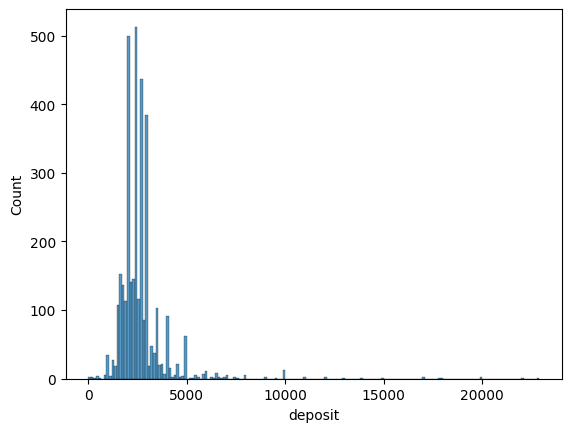

In [40]:
sns.histplot(data = imputed_df, x = "deposit")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 30000.0)

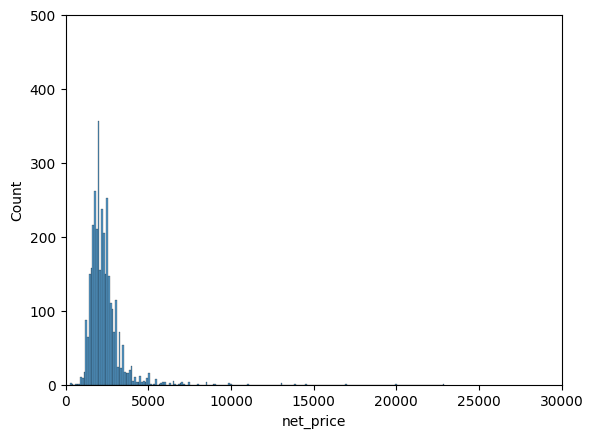

In [41]:
sns.histplot(data = imputed_df, x = "net_price")
plt.ylim(0, 500)
plt.xlim(0,30000)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 5000.0)

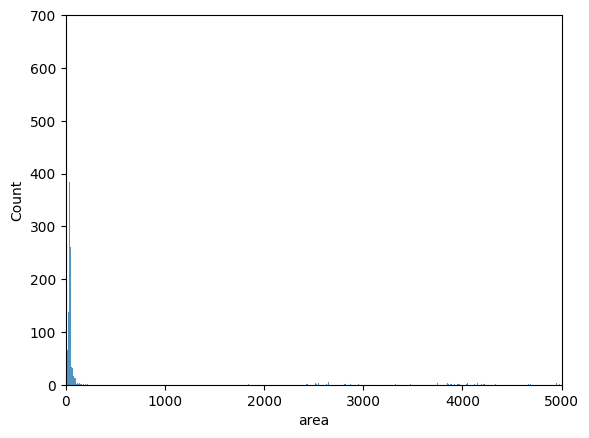

In [42]:
sns.histplot(data = imputed_df, x = "area", stat = "count")
plt.ylim(0, 700)
plt.xlim(0,5000)

<Axes: xlabel='net_price'>

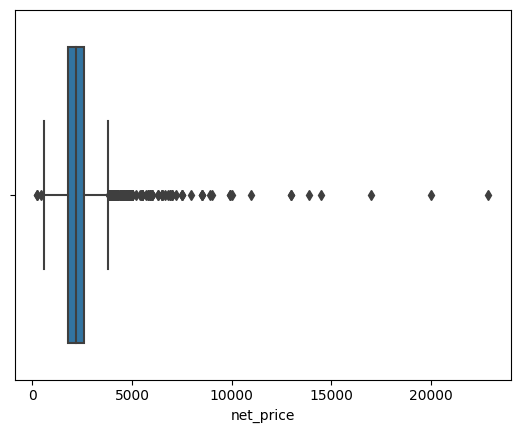

In [43]:
sns.boxplot(x = imputed_df["net_price"])

<Axes: xlabel='area'>

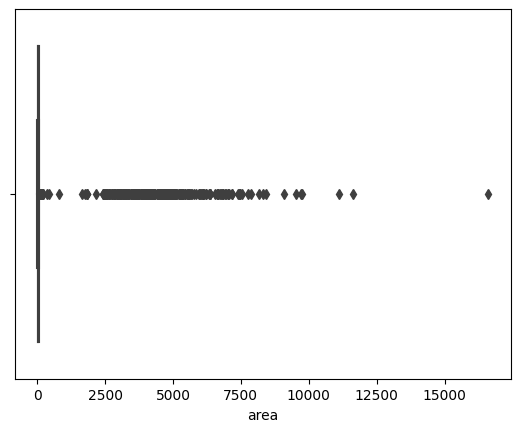

In [44]:
sns.boxplot(x = imputed_df["area"])